# Bank Customer churn prediction

**The task is to train a machine learning model to predict whether a bank customer will churn (leave the bank) or not based on various customer attributes and banking behavior. The goal is to create a model that can accurately identify customers who are likely to churn, enabling proactive retention strategies.**

In [1]:
#importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#loading dataset
df=pd.read_csv('Churn_Modelling.csv')
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


# Exploratory  Data Analysis

In [3]:
df.shape

(10000, 14)

In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
# Get unique count for each variable
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

**Let's drop the columns RowNumber,CustomerId, Surname . becouse it is not needed for the prediction.**

In [9]:
# Drop the columns as explained above
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
# Check variable data types
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [12]:
import seaborn as sns

<Axes: xlabel='Exited', ylabel='count'>

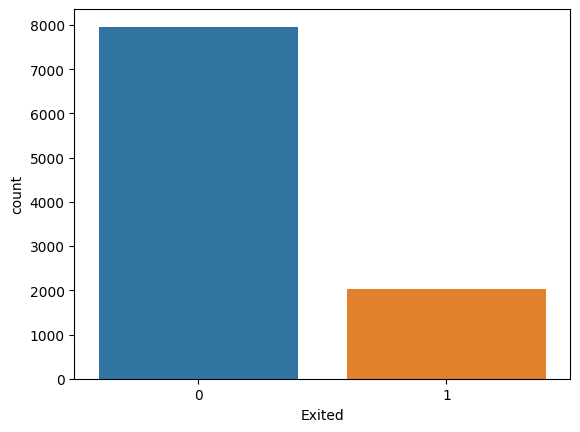

In [13]:
sns.countplot(x='Exited',data=df)

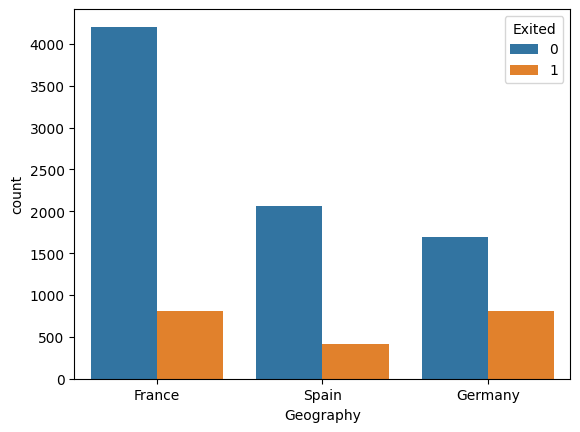

In [14]:
sns.countplot(x='Geography',hue='Exited',data=df)
plt.show()

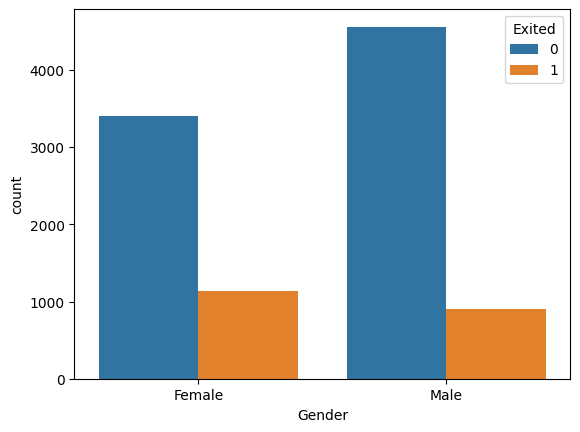

In [15]:
sns.countplot(x='Gender',hue='Exited',data=df)
plt.show()


In [16]:
# encoding categorical data
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [17]:
df=pd.get_dummies(df,drop_first=True)

In [18]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


# Splitting Data

In [19]:
x = df.drop('Exited',axis=1)
y = df['Exited']

In [20]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

# Model Building

In [21]:
# splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42,stratify=y)

In [22]:
# feature scaling
from sklearn.preprocessing import StandardScaler

In [23]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [24]:
x_train

array([[ 1.058568  ,  1.71508648,  0.68472287, ..., -0.57831252,
        -0.57773517,  0.90750738],
       [ 0.91362605, -0.65993547, -0.6962018 , ...,  1.72916886,
        -0.57773517,  0.90750738],
       [ 1.07927399, -0.18493108, -1.73189531, ...,  1.72916886,
        -0.57773517, -1.10191942],
       ...,
       [ 0.16821031, -0.18493108,  1.3751852 , ..., -0.57831252,
        -0.57773517, -1.10191942],
       [ 0.37527024, -0.37493284,  1.02995403, ..., -0.57831252,
         1.73089688,  0.90750738],
       [ 1.56586482,  1.14508121,  0.68472287, ..., -0.57831252,
         1.73089688,  0.90750738]])

**1.Logistic Regression**

In [25]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [26]:
y_pred=log.predict(x_test)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(y_test,y_pred)
print("Accuracy Score: " ,accuracy_score(y_test,y_pred))

Accuracy Score:  0.808


**2.SVC**

In [29]:
# SVC
from sklearn import svm
SVC=svm.SVC()
SVC.fit(x_train,y_train)
y_pred2=SVC.predict(x_test)

In [30]:
accuracy_score(y_test,y_pred2)
print("Accuracy Score: " ,accuracy_score(y_test,y_pred2))

Accuracy Score:  0.861


**3.KNeighbour Classifier**

In [31]:
# KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
y_pred3=KNN.predict(x_test)

In [32]:
accuracy_score(y_pred3,y_test)
print("Accuracy Score: " ,accuracy_score(y_pred3,y_test))

Accuracy Score:  0.824


**4.Decision Tree Classifier**

In [33]:
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
y_pred4=DT.predict(x_test)

In [34]:
accuracy_score(y_test,y_pred4)
print("Accuracy Score: " ,accuracy_score(y_test,y_pred4))

Accuracy Score:  0.7865


**5.Random Forest Classifier**

In [35]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
y_pred5=RF.predict(x_test)

In [36]:
accuracy_score(y_test,y_pred5)
print("Accuracy Score: " ,accuracy_score(y_test,y_pred5))

Accuracy Score:  0.8625


**6.Gradient Boosting Classifier**

In [37]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)

GradientBoostingClassifier()

In [38]:
y_pred6=GBC.predict(x_test)
accuracy_score(y_pred6,y_test)
print("Accuracy Score: " ,accuracy_score(y_pred6,y_test))

Accuracy Score:  0.87


In [39]:
final_data=pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],'ACC':[accuracy_score(y_test,y_pred),
                                                                            accuracy_score(y_test,y_pred2),
                                                                            accuracy_score(y_test,y_pred3),
                                                                            accuracy_score(y_test,y_pred4),
                                                                            accuracy_score(y_test,y_pred5),
                                                                            accuracy_score(y_test,y_pred6)]})

In [40]:
final_data

,Models,ACC
0,LR,0.8080
1,SVC,0.8610
2,KNN,0.8240
3,DT,0.7865
4,RF,0.8625
5,GBC,0.8700


<Axes: xlabel='Models', ylabel='ACC'>

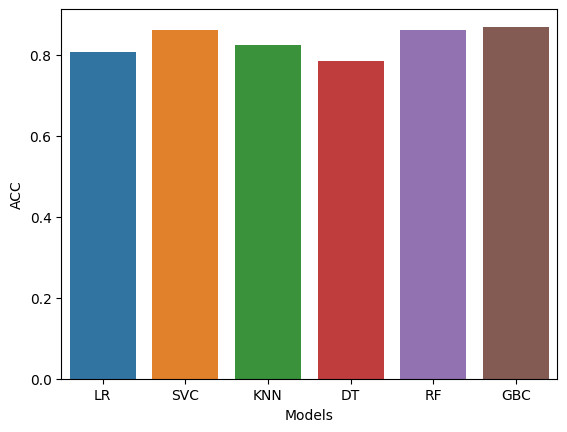

In [41]:
sns.barplot(x=final_data['Models'],y=final_data['ACC'])

**Random forest classifier gets the highest accuracy score , so we will use it for modeling**

In [42]:
# handling imbalanced data with SMOTE
from imblearn.over_sampling import SMOTE
x_res,y_res=SMOTE().fit_resample(x,y)
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [43]:
# Save the model
RF.fit(x_res,y_res)

RandomForestClassifier()

In [44]:
import joblib
joblib.dump(RF,'churn_predict_model')

['churn_predict_model']

In [45]:
model=joblib.load('churn_predict_model')
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

**Test 1**

In [46]:
model.predict([[619,42,2,0,0,0,0,101348.88,0,0,0]])

C:\Users\NEWHP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

**Test 2**

In [47]:
model.predict([[300,22,2,1,0,1,0,10138.88,0,1,0]])

C:\Users\NEWHP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)